In [35]:
import pandas as pd
import numpy as np


In [36]:
df = pd.read_csv('Housing.csv')

In [37]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [38]:
for col in binary_cols:
    print(f"{col}: {df[col].unique()}")

mainroad: ['yes' 'no']
guestroom: ['no' 'yes']
basement: ['no' 'yes']
hotwaterheating: ['no' 'yes']
airconditioning: ['yes' 'no']
prefarea: ['yes' 'no']


In [39]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))


In [40]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [41]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


In [42]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,False,False


In [43]:
df['furnishingstatus_semi-furnished'] = df['furnishingstatus_semi-furnished'].astype(int)
df['furnishingstatus_unfurnished'] = df['furnishingstatus_unfurnished'].astype(int)

In [44]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [45]:
df.isnull().any()

,0
price,False
area,False
bedrooms,False
bathrooms,False
stories,False
mainroad,False
guestroom,False
basement,False
hotwaterheating,False
airconditioning,False


In [46]:
from sklearn.model_selection import train_test_split


In [47]:
X = df.drop('price', axis=1)
y = df['price']


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (436, 13)
Testing features shape: (109, 13)
Training labels shape: (436,)
Testing labels shape: (109,)


In [50]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
46,6000,3,2,4,1,0,0,0,1,1,0,0,0
93,7200,3,2,1,1,0,1,0,1,3,0,1,0
335,3816,2,1,1,1,0,1,0,1,2,0,0,0
412,2610,3,1,2,1,0,1,0,0,0,1,0,1
471,3750,3,1,2,1,0,0,0,0,0,0,0,1


In [51]:
X_test.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
316,5900,4,2,2,0,0,1,0,0,1,0,0,1
77,6500,3,2,3,1,0,0,0,1,0,1,0,0
360,4040,2,1,1,1,0,0,0,0,0,0,1,0
90,5000,3,1,2,1,0,0,0,1,0,0,1,0
493,3960,3,1,1,1,0,0,0,0,0,0,0,0


In [52]:
y_train.head()

,price
46,7525000
93,6300000
335,3920000
412,3430000
471,3010000


In [53]:
from sklearn.linear_model import LinearRegression


In [54]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [56]:
y_pred = lr_model.predict(X_test)


In [57]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 970043.40
MSE: 1754318687330.66
R²: 0.65


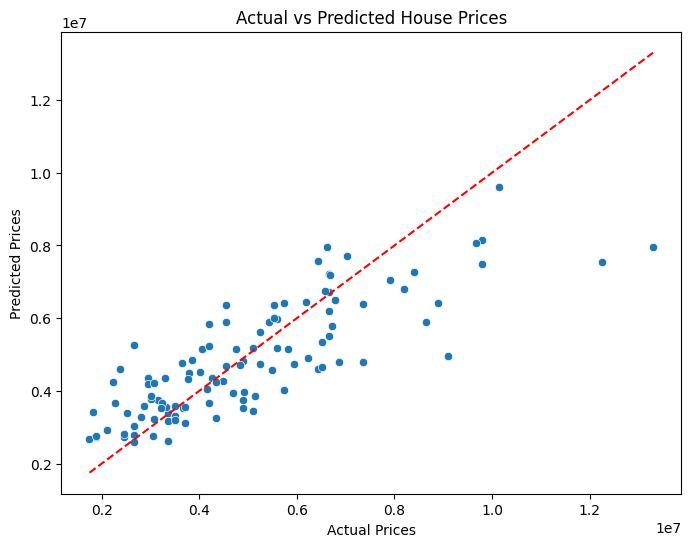

                            Feature   Coefficient
2                         bathrooms  1.094445e+06
8                   airconditioning  7.914267e+05
7                   hotwaterheating  6.846499e+05
10                         prefarea  6.298906e+05
3                           stories  4.074766e+05
6                          basement  3.902512e+05
4                          mainroad  3.679199e+05
5                         guestroom  2.316100e+05
9                           parking  2.248419e+05
1                          bedrooms  7.677870e+04
0                              area  2.359688e+02
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# Coefficient interpretation
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)